### Neste notebook se passa o processo do HDR (High Dynamic Range)

In [2]:
#Importação das bibliotecas
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

%matplotlib inline

In [3]:
#Fazendo download e descompactando os arquivos da aula
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")
    urlretrieve(url, save_path)

    try:
        with ZipFile(save_path) as z:
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

URL = r"https://www.dropbox.com/s/qa1hsyxt66pvj02/opencv_bootcamp_assets_NB10.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB10.zip")


if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

In [5]:
def readImagesAndTimes():
    #os arquivos das imagens
    filenames = ["img_0.033.jpg", "img_0.25.jpg", "img_2.5.jpg", "img_15.jpg"]

    #lista dos tempos de exposição
    times = np.array([1 / 30.0, 0.25, 2.5, 15.0], dtype=np.float32)

    #le as imagens e passa para uma lista
    images = []
    for filename in filenames:
        im = cv2.imread(filename)
        images.append(im)

    return images, times

In [6]:
#aplica a funçãõ criada e recebe as imagens e os tempos
images, times = readImagesAndTimes()

#alinha as imagens
alignMTB = cv2.createAlignMTB()
alignMTB.process(images, images)

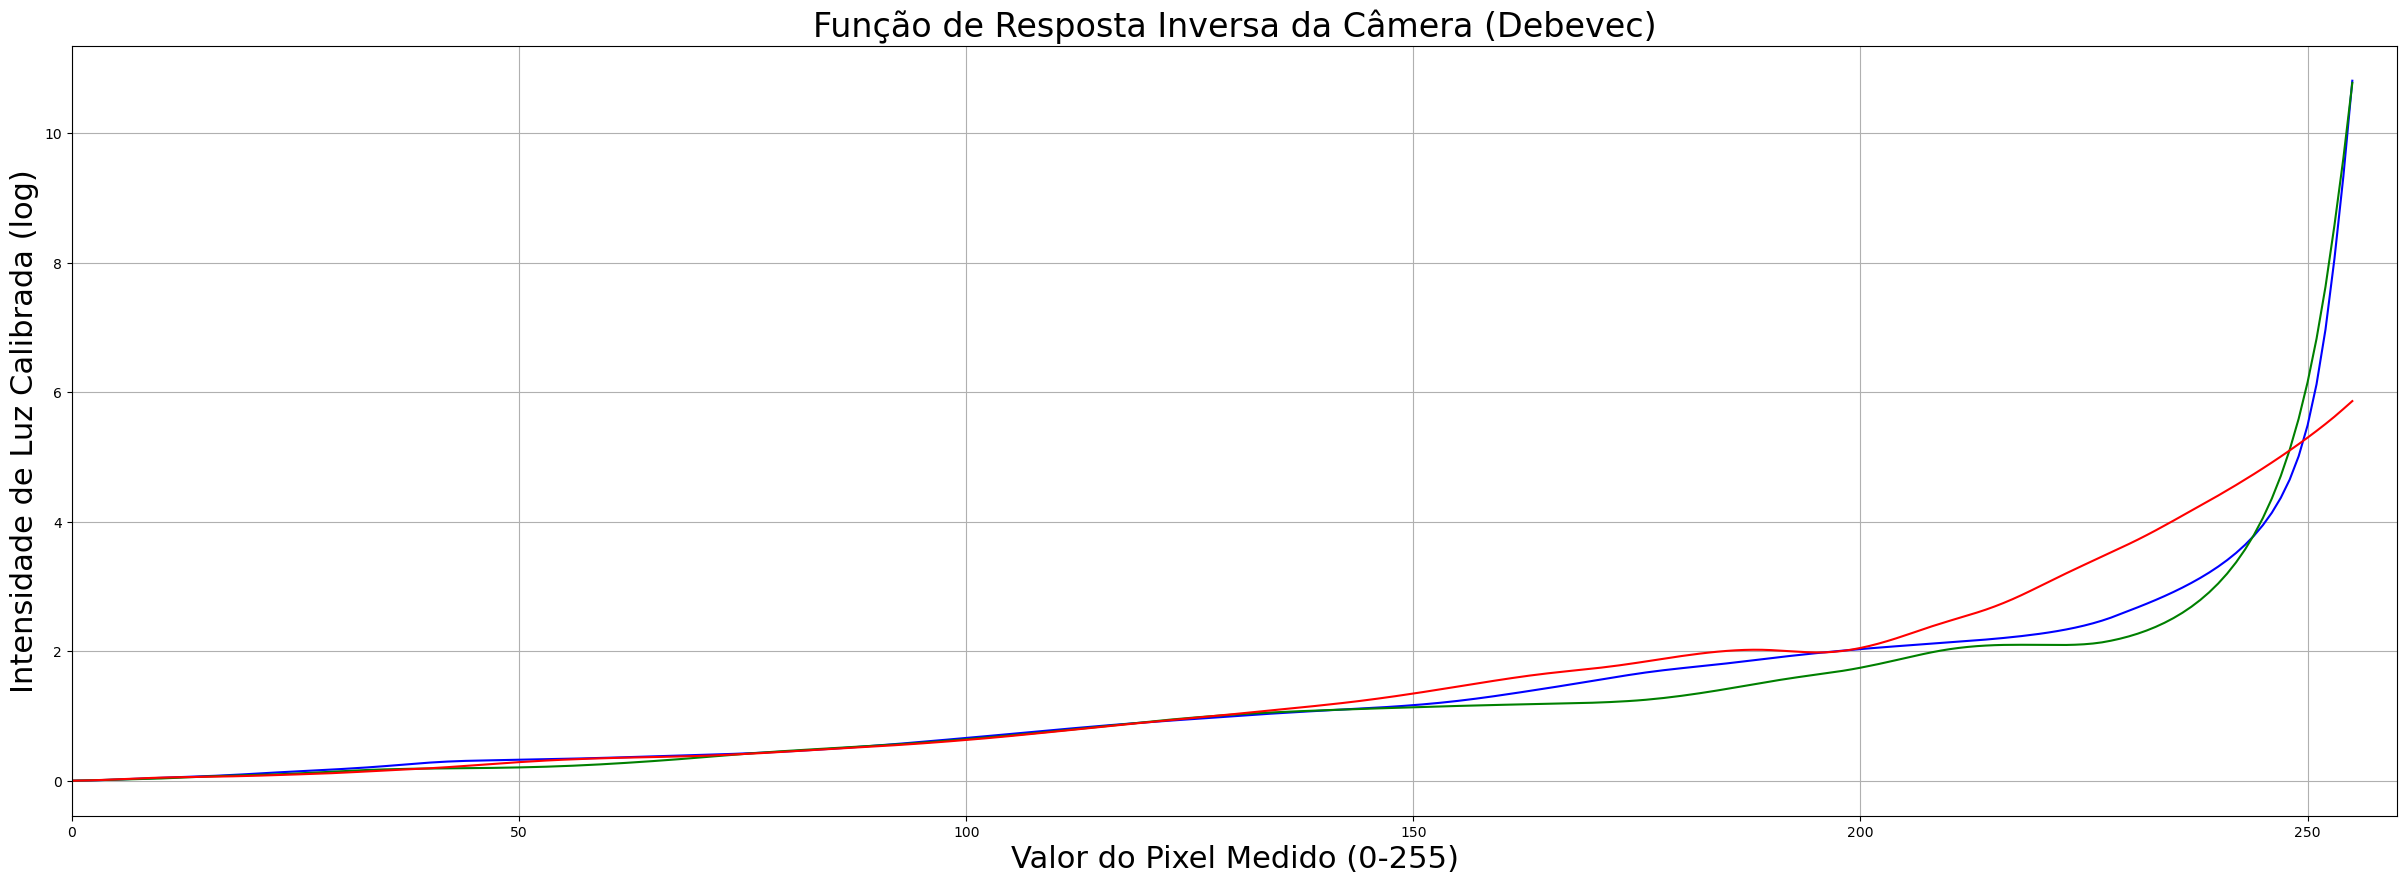

In [7]:
#Encontrar a funçao de resposta da camera (CRF)
#O método de Debevec estima como o sensor da câmera reage a diferentes níveis de luz
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images, times)

#plotar a CRF 
x = np.arange(256, dtype=np.uint8)
y = np.squeeze(responseDebevec)

#configuração do gráfico usando Matplotlib
ax = plt.figure(figsize=(30, 10))
plt.title("Função de Resposta Inversa da Câmera (Debevec)", fontsize=24)
plt.xlabel("Valor do Pixel Medido (0-255)", fontsize=22)
plt.ylabel("Intensidade de Luz Calibrada (log)", fontsize=22)
plt.xlim([0, 260])
plt.grid()
plt.plot(x, y[:, 0], "b", x, y[:, 1], "g", x, y[:, 2], "r")

In [8]:
#juntando as imagens em uma com o HDR linear
mergeDebevec = cv2.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, times, responseDebevec)

[ WARN:0@1722.578] global matrix_expressions.cpp:1333 assign OpenCV/MatExpr: processing of multi-channel arrays might be changed in the future: https://github.com/opencv/opencv/issues/16739
[ WARN:0@1722.782] global loadsave.cpp:1089 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.


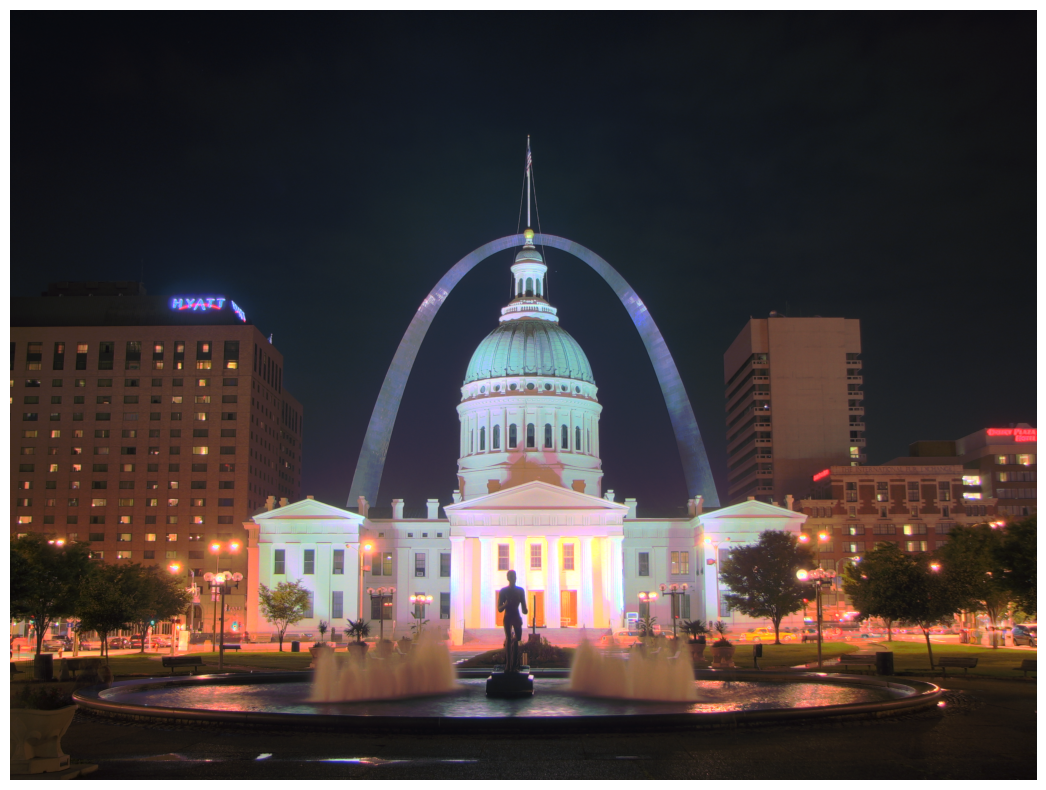

In [9]:
#Mapeamento de tons usando o metodo do Drago para obter uma imagem colorida de 24 bits
tonemapDrago = cv2.createTonemapDrago(1.0, 0.7)
ldrDrago = tonemapDrago.process(hdrDebevec)
ldrDrago = 3 * ldrDrago

#salvando imagem
cv2.imwrite("ldr-Drago.jpg", 255*ldrDrago)

#plotando a imagem
plt.figure(figsize=(20, 10));plt.imshow(np.clip(ldrDrago, 0, 1)[:,:,::-1]);plt.axis("off");

Tonemaping using Reinhard's method ... 


(-0.5, 2815.5, 2111.5, -0.5)

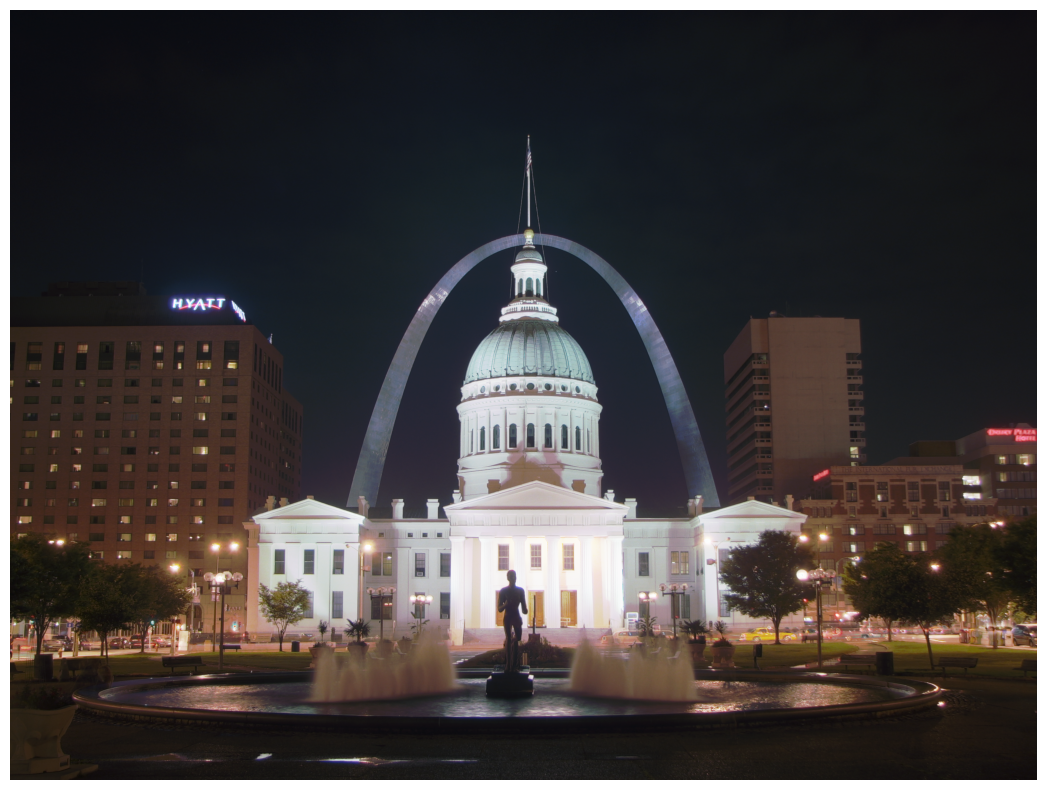

In [10]:
#Mapeamento de tons usando o metodo do Reinhard para obter uma imagem colorida de 24 bits
print("Tonemaping using Reinhard's method ... ")
tonemapReinhard = cv2.createTonemapReinhard(1.5, 0, 0, 0)
ldrReinhard = tonemapReinhard.process(hdrDebevec)

#salvando imagem
cv2.imwrite("ldr-Reinhard.jpg", ldrReinhard * 255)

#plotando imagem
plt.figure(figsize=(20, 10));plt.imshow(np.clip(ldrReinhard, 0, 1)[:,:,::-1]);plt.axis("off")

Tonemaping using Mantiuk's method ... 


(-0.5, 2815.5, 2111.5, -0.5)

/home/lucas/anaconda3/envs/opencv/lib/python3.9/site-packages/matplotlib/cm.py:317: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


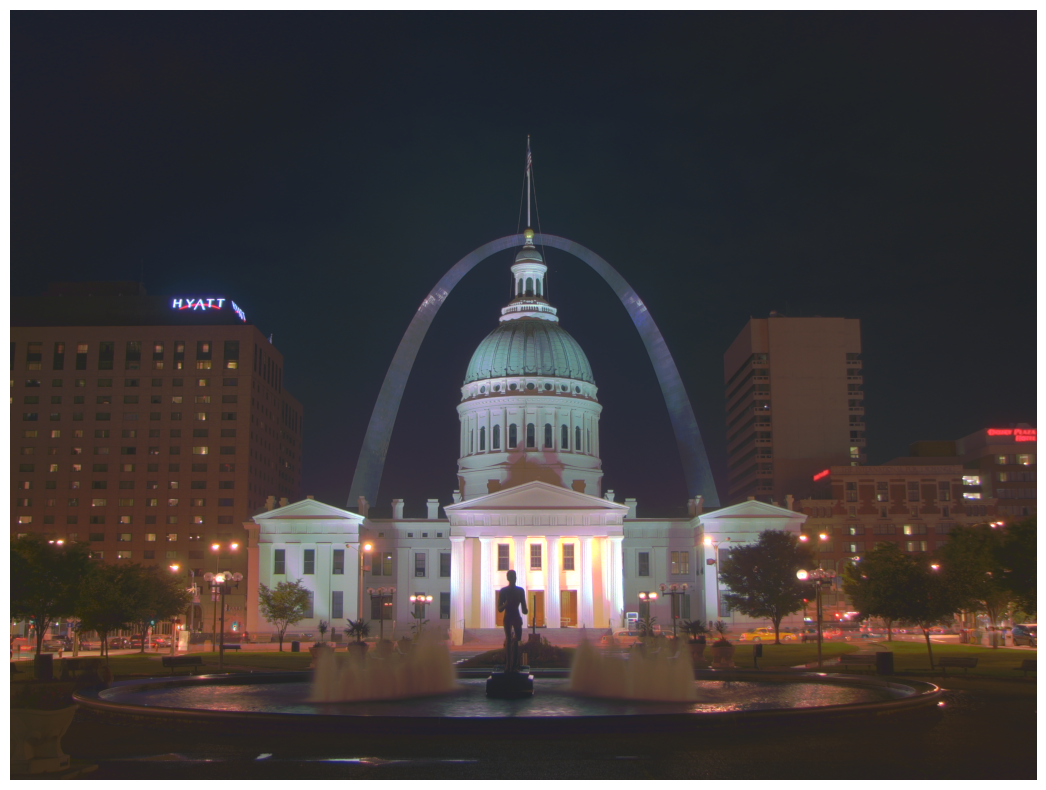

In [11]:
#Mapeamento de tons usando o metodo do Mantiuk para obter uma imagem colorida de 24 bits
print("Tonemaping using Mantiuk's method ... ")
tonemapMantiuk = cv2.createTonemapMantiuk(2.2, 0.85, 1.2)
ldrMantiuk = tonemapMantiuk.process(hdrDebevec)
ldrMantiuk = 3 * ldrMantiuk

cv2.imwrite("ldr-Mantiuk.jpg", ldrMantiuk * 255)

plt.figure(figsize=(20, 10));plt.imshow(np.clip(ldrMantiuk, 0, 1)[:,:,::-1]);plt.axis("off")